# FERM 533 Assignment I

In [1]:
# Let's start with importing the necessary libraries as we go
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import date

### a) Plot the stock price over time.

In [2]:
def plot_stock_price(ticker, start_date, end_date):
    # Download stock data from Yahoo Finance
    stock_data = yf.download(ticker, start=start_date, end=end_date)

    # Resample data to monthly frequency
    monthly_data = stock_data['Close'].resample('M').mean()

    # Plot the stock price
    plt.figure(figsize=(12, 6))
    plt.plot(monthly_data, linestyle='-')
    plt.title(f'{ticker} Stock Price (Monthly)')
    plt.xlabel('Date')
    plt.ylabel('Stock Price (USD)')
    plt.grid(True)
    plt.show()

[*********************100%***********************]  1 of 1 completed


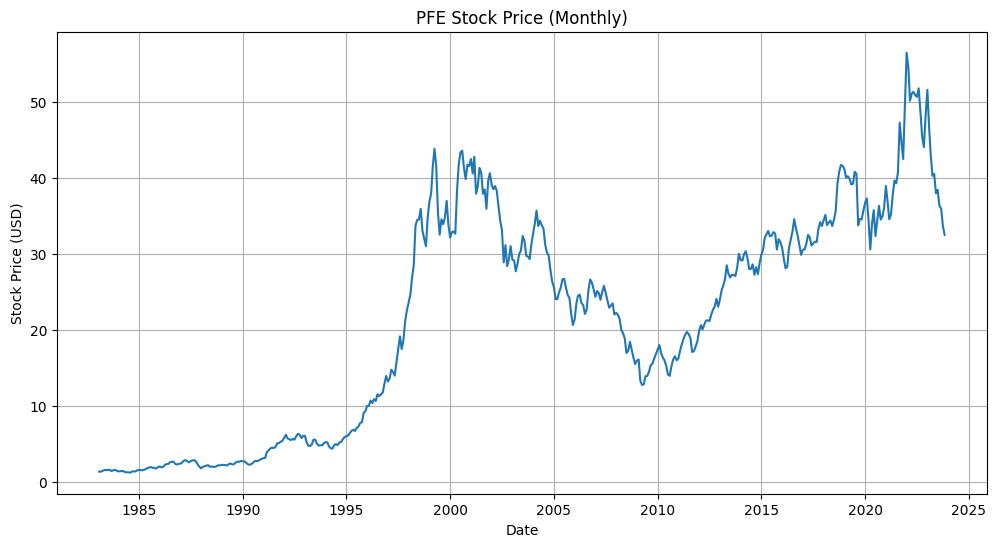

In [3]:
plot_stock_price("PFE", "1983-01-01", date.today())

### b) Calculate the monthly returns and plot them.

### c) Provide summary statistics for monthly returns

Did these parts in one go, since it's easier to give out summary of returns in the same function.

In [18]:
def calculate_monthly_returns(ticker, start_date, end_date):
    # Download stock data from Yahoo Finance
    stock_data = yf.download(ticker, start=start_date, end=end_date)

    # Calculate daily returns
    daily_returns = stock_data['Close'].pct_change()

    # Resample daily returns to monthly frequency and drop NaN values
    monthly_returns = daily_returns.resample('M').mean().dropna()

    # Print summary
    print("\nSummary of Monthly Returns:")
    print(monthly_returns.describe())
    
    return monthly_returns

In [19]:
def plot_monthly_returns(ticker, start_date, end_date):
    # Calculate monthly returns
    monthly_returns = calculate_monthly_returns(ticker, start_date, end_date)

    # Plot the monthly returns
    plt.figure(figsize=(12, 6))
    plt.plot(monthly_returns, linestyle='-')
    plt.title(f'{ticker} Monthly Returns')
    plt.xlabel('Date')
    plt.ylabel('Monthly Returns')
    plt.grid(True)
    plt.show()

[*********************100%***********************]  1 of 1 completed

Summary of Monthly Returns:
count    490.000000
mean       0.000435
std        0.003241
min       -0.010594
25%       -0.001481
50%        0.000397
75%        0.002454
max        0.011463
Name: Close, dtype: float64


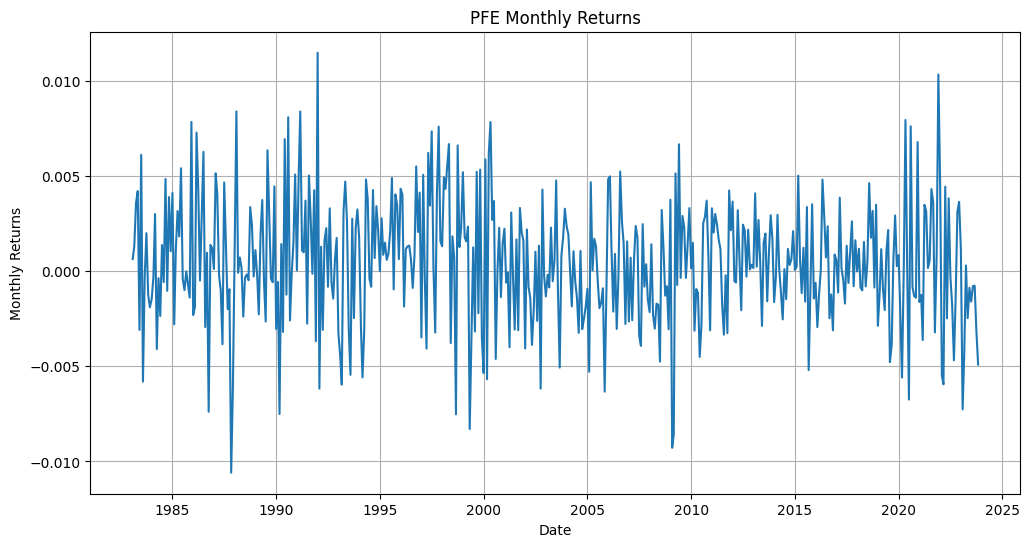

In [20]:
plot_monthly_returns("PFE", "1983-01-01", date.today())

### d) Regress PFE returns on S&P500 (ticker ^GSPC) returns. Write out the fitted regression model.

In [32]:
# We need to add the additional library statsmodels at this point
import statsmodels.api as sm

In [33]:
def regress_returns(stock_ticker, benchmark_ticker, start_date, end_date):
    # Download stock and benchmark data from Yahoo Finance
    stock_data = yf.download(stock_ticker, start=start_date, end=end_date)['Close'].pct_change().dropna()
    benchmark_data = yf.download(benchmark_ticker, start=start_date, end=end_date)['Close'].pct_change().dropna()

    # Add a constant term to the independent variable (benchmark)
    X = sm.add_constant(benchmark_data)

    # Fit the regression model, use Ordinary Least Squares
    model = sm.OLS(stock_data, X).fit()

    # Print out the regression results
    print(model.summary())

    # Plot actual vs predicted returns
    plt.figure(figsize=(12, 6))

    # Plot actual returns
    plt.plot(stock_data.index, stock_data, label=f'{stock_ticker} Actual Returns', linestyle='-')

    # Plot predicted returns
    plt.plot(stock_data.index, model.predict(X), label=f'{stock_ticker} Predicted Returns', linestyle='-')

    plt.title(f'{stock_ticker} Returns vs. Benchmark Returns')
    plt.xlabel('Date')
    plt.ylabel('Returns')
    plt.legend()
    plt.grid(True)
    plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     4483.
Date:                Wed, 25 Oct 2023   Prob (F-statistic):               0.00
Time:                        08:57:21   Log-Likelihood:                 29192.
No. Observations:               10287   AIC:                        -5.838e+04
Df Residuals:                   10285   BIC:                        -5.837e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      

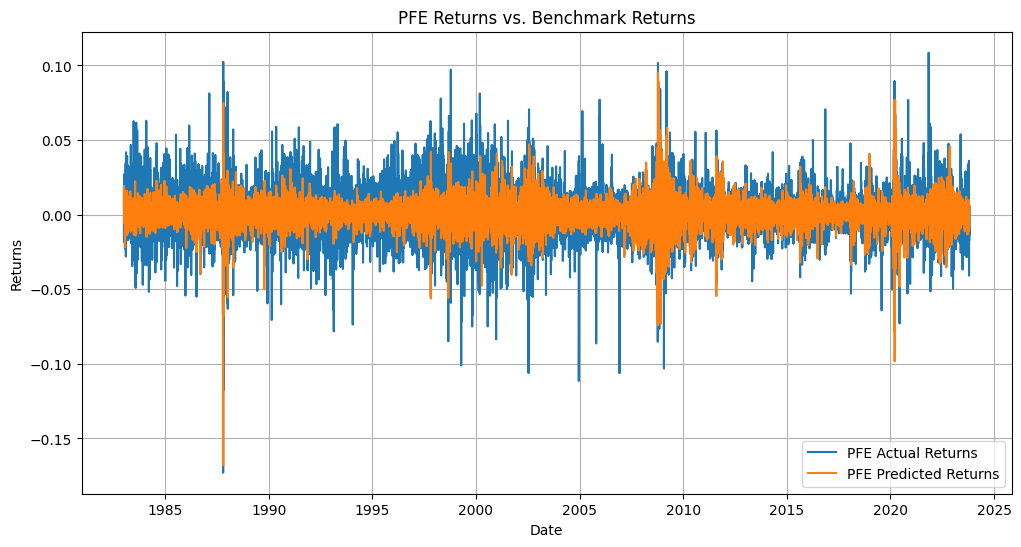

In [34]:
regress_returns("PFE", "^GSPC", "1983-01-01", date.today())

### e) Comment on the statistical significance of the estimated regression coefficients.

Upon taking a look at the coefficient of Close = 0.8214, we can comment that on average, when a single-unit increase in S&P500 occurs, Pfizer Inc. returns are expected to increase by 0.8214 units. We can say that Pfizer is less volatile compared to the benchmark.

R-Squared =  0.304 tells us that approximately 30.4% of the variability in Pfizer Inc. returns can be explained by S&P500's returns.

Low P-value 0.00.. indicates that the Close coefficient is very close to zero, meaning that there's a statistical significance.

The standard error for Intercept 0.000 should be disregarded, because S&P500 returns are unlikely to be exactly zero.
We should look instead for the standard error for Close = 0.012, which indicates a low level of variability in the impact of S&P500 on the returns of Pfizer Inc. 